In [1]:
# delete when submit

from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/Computer Vision/assignment')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Sudoku Solver

In this assignment you are asked to **solve a Sudoku** in a photo.

You will need to implement the entire image preprocessing and digit recognition pipeline,\
whereas an algorithm for solving the Sudoku puzzle will be provided.

## Submission

To complete this task correctly and efficiently, here are some rules and recommendations:

* Plagiarism is **not allowed**! Discussions with your colleagues must not be converted to a copy-paste solution.

* Instead of rewriting existing code **use built-in methods** available in the libraries. There exists a class/method for most of the functions needed in this Assignment.

* We recommend that you **go through the relevant documentation and links** in this notebook. In this assignment we will mainly use [numpy](https://numpy.org/doc/stable/), [opencv](https://opencv.org/), [scikit-image](https://scikit-image.org/) and [matplotlib](https://matplotlib.org/) libraries. Also remember that tutorials, lecture slides, [Google](https://www.google.com/) and [StackOverflow](https://stackoverflow.com/) are your close friends throughout the course.

* Your code must be readable by any competent reviewer. For this purpose, include **necessary** (and no more) comments inside the code.\
  However, remember: **good code must be self-explanatory**.

* In all files you are allowed to write **your code only between** the following placeholders:

    ```python
    # BEGIN YOUR ...
    
    # END YOUR ...
    ```
    \
    **or in place**

    ```python
    something = # YOUR CODE
    ```
    \
    **!Attention!** Everything else must remain as is.

---

**Before the submission**

1. Run `create_templates.py` to ensure that your templates are being created in the `templates` folder.\
   You are allowed to create **no more than 2** templates for each digit.
2. Run `test.py` with the argument `--path=<...>` to ensure that your implementation works.

---
Please **upload the following files to ILIAS**:

* `frontalization.py`
* `recognition.py`
* `create_templates.py`
* `pipeline.py`
* `test.py`

## Assignment

You need to follow this notebook and implement all the necessary code snippets in the `frontalization.py`, `recognition.py`, `create_templates.py`, `pipeline.py` and `test.py` files.

In _this_ jupyter notebook you can test different steps of your pipeline,\
whereas the file `test.py` will be used to test your implementation.

The folder `./sudoku_puzzles/train` contains images of Sudoku puzzles.\
You can find images taken:
* under different light conditions
* from different viewpoints
* with digits printed in different styles

<div style="display: flex; justify-content: space-between;">
  <figure style="margin-left: 10px; margin-right: 0;">
    <figcaption>image_0.jpg</figcaption>
    <img src="./sudoku_puzzles/train/image_0.jpg" width="200">
  </figure>
  
  <figure style="margin-left: 5px; margin-right: 0;">
    <figcaption>image_1.jpg</figcaption>
    <img src="./sudoku_puzzles/train/image_1.jpg" width="200">
  </figure>
  
  <figure style="margin-left: 5px; margin-right: 0;">
    <figcaption>image_2.jpg</figcaption>
    <img src="./sudoku_puzzles/train/image_2.jpg" width="115">
  </figure>

  <figure style="margin-left: 5px; margin-right: 0;">
    <figcaption>image_3.jpg</figcaption>
    <img src="./sudoku_puzzles/train/image_3.jpg" width="115">
  </figure>

  <figure style="margin-left: 5px; margin-right: 0;">
    <figcaption>image_4.jpg</figcaption>
    <img src="./sudoku_puzzles/train/image_4.jpg" width="200">
  </figure>
</div>

<div style="display: flex; justify-content: space-between;">
  <figure style="margin-left: 10px; margin-right: 0;">
    <figcaption>image_5.jpg</figcaption>
    <img src="./sudoku_puzzles/train/image_5.jpg" width="200">
  </figure>
  
  <figure style="margin-left: 5px; margin-right: 0;">
    <figcaption>image_6.jpg</figcaption>
    <img src="./sudoku_puzzles/train/image_6.jpg" width="200">
  </figure>
  
  <figure style="margin-left: 5px; margin-right: 0;">
    <figcaption>image_7.jpg</figcaption>
    <img src="./sudoku_puzzles/train/image_7.jpg" width="200">
  </figure>

  <figure style="margin-left: 5px; margin-right: 0;">
    <figcaption>image_8.jpg</figcaption>
    <img src="./sudoku_puzzles/train/image_8.jpg" width="200">
  </figure>

  <figure style="margin-left: 5px; margin-right: 0;">
    <figcaption>image_9.jpg</figcaption>
    <img src="./sudoku_puzzles/train/image_9.jpg" width="115">
  </figure>
</div>

The folder `./sudoku_puzzles/test` is not available to you and will be used to test your pipeline.\
However, rest assured that the Sudoku puzzles in the test images are in the same font and printing style as those in the train images.

## Grading

### Frontalization

* **[max 20 points]** if frontalization works on images from the **_train_** set
* **[max 20 points]** if frontalization works on images from the **_test_** set

**2 points are given for each valid result**

---

* **[+5 points]** if frontalization works on **all** images from the **_train_** set
* **[+5 points]** if frontalization works on **all** images from the **_test_** set

---

### Recognition

* **[max 20 points]** if recognition works (_$3$ or fewer errors out of $81$ sudoku cells_) on images from the **_train_** set
* **[max 20 points]** if recognition works (_$3$ or fewer errors out of $81$ sudoku cells_) on images from the **_test_** set

**2 points are given for each valid result**

---

* **[+5 points]** if recognition works on **all** images from the **_train_** set
* **[+5 points]** if recognition works on **all** images from the **_test_** set

## 0. Read Sudoku Image

Read an image of the Sudoku puzzle as an example to see what happened at each step of your _sudoku_solver_ pipeline.

After all, we need to recognize the digits inside the Sudoku grid.\
All digits are color-independent. So we will be working with _grayscale_ images.

In [2]:
import os

from utils import read_image, show_image

In [3]:
IMAGES_PATH = os.path.join(".", "sudoku_puzzles", "train")

In [4]:
image_path = os.path.join(IMAGES_PATH, "image_0.jpg")
sudoku_image = read_image(image_path=image_path)

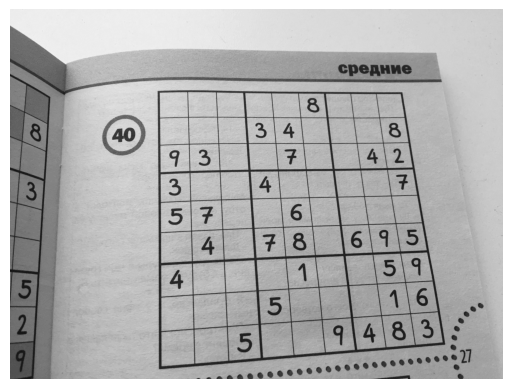

In [5]:
show_image(sudoku_image, as_gray=True)

### 0.1 Pipeline

For your convenience, there is a _Pipeline_ class in the `pipeline.py` file.

In [6]:
from pipeline import Pipeline

You can use this class to display what happened after each step of your frontalization pipeline.

```python
pipeline = Pipeline(functions=[find_edges, find_contours, get_max_contour, find_corners],
                    parameters={"find_corners": {"accuracy": 0.01}})

output = pipeline(sudoku_image, plot=True, figsize=(18, 12))
```

## 1. Frontalization

This is a high-level view of the first part of the sudoku solver.\
Below in the sections you wil find the step-by-step instructions.

With this part we will transform and crop an image with a Sudoku to avoid unnecessary background information.\
After that, we will be left with an image with only a $9\times 9$ Sudoku grid and digits inside.

Working with frontalized patches with digits is an important step for successful recognition of the digits.\

To **frontalize** an image we need to apply a transformation that maps the distorted Sudoku grid in the input image to a rectified squared Sudoku grid. To do so we need to find the $4$ corners of the Sudoku grid and to find these corners we need to find the closed contour with the maximum area.

You need to implement the functions inside the `frontalization.py` file.

### 1.1 Find Max Contour

A [_contour_](https://docs.opencv.org/4.x/d4/d73/tutorial_py_contours_begin.html) can be explained simply as a curve joining all the continuous points (along the boundary) that have the same intensity.\
Each individual contour is an array of $(x, y)$ coordinates of boundary points of the object.

#### 1.1.1 Find Edges

For better accuracy, we should use binary images.\
That is why we will use edges as input to find contours.

In [7]:
from frontalization import find_edges

In [8]:
# pipeline = Pipeline(functions=[find_edges])
# _ = pipeline(sudoku_image, plot=True)

#### 1.1.2 Highlight Edges

The edges found seem to be thin.\
To make them thicker we need to add pixels to the boundaries of objects in an image.

For example, [_morphological dilation_](https://scikit-image.org/docs/stable/api/skimage.morphology.html#skimage.morphology.dilation) makes objects more visible and fills in small holes in objects.\
So, lines appear thicker and filled shapes appear larger.

Will this help find the contour of the maximum area?

In [9]:
from frontalization import highlight_edges

In [10]:
# pipeline = Pipeline(functions=[find_edges, highlight_edges])
# _ = pipeline(sudoku_image, plot=True, figsize=(24, 24))

#### 1.1.3 Find Countours

We assume that in the image of the Sudoku grid will have a maximum area contour (see contour definition above).\
So, we need to find all the contours and then select the one with the maximum area.

In [11]:
from frontalization import find_contours

In [12]:
# pipeline = Pipeline(functions=[find_edges, highlight_edges, find_contours])
# _ = pipeline(sudoku_image, plot=True, figsize=(24, 12))

#### 1.1.4 Get Maximum Area Contour

In [13]:
from frontalization import get_max_contour

Compare two pipelines: **with** and **without** edge highlighting.\
Is there any difference in getting the maximum area contour?

In [14]:
# pipeline = Pipeline(functions=[find_edges, highlight_edges, find_contours, get_max_contour])
# _ = pipeline(sudoku_image, plot=True, figsize=(24, 12))

In [15]:
# pipeline = Pipeline(functions=[find_edges, find_contours, get_max_contour])
# _ = pipeline(sudoku_image, plot=True, figsize=(24, 12))

### 1.2 Find Corners

The found contour consists of a large number of points.\
To get $4$ corners of a quadrilateral related to this contour we need to find an approximation of this contour with fewer vertices.

Ideally, we need an approximated contour with $4$ points.\
[The Ramer–Douglas–Peucker algorithm](https://en.wikipedia.org/wiki/Ramer%E2%80%93Douglas%E2%80%93Peucker_algorithm) finds a [simplified curve](https://docs.opencv.org/3.4/dd/d49/tutorial_py_contour_features.html) consisting of a subset of the points that defined the original curve.\
This algorithm has an adjustable parameter $\varepsilon$ that defines the maximum distance between the original curve and the simplified one.\
Will we always have $4$ points in our approximated contour?

Additionally, for further convenience, we would like to return an array of corner points in order

$$[\text{top left, top right, bottom right, bottom left}]$$

In [16]:
from frontalization import find_corners

In [17]:
# pipeline = Pipeline(functions=[find_edges, highlight_edges, find_contours, get_max_contour, find_corners],
#                     parameters={"find_corners": {"accuracy": 0.1}})
# _ = pipeline(sudoku_image, plot=True, figsize=(24, 12))

### 1.3 Tricks

#### 1.3.1 Rescaling

For [rescaling](https://scikit-image.org/docs/stable/auto_examples/transform/plot_rescale.html) with the $\text{scale factor} < 1$ Gaussian smoothing will be performed to avoid aliasing artifacts.\
That is, the rescaled image will be blurry and have less noise. That is why stronger edges and contours will be found.

In [18]:
from frontalization import rescale_image

In [19]:
# print(f"original image shape: {sudoku_image.shape}\nrescaled image shape: {rescale_image(sudoku_image, scale=0.5).shape}")

In [20]:
# pipeline = Pipeline(functions=[rescale_image, find_edges, highlight_edges, find_contours, get_max_contour, find_corners],
#                     parameters={"rescale_image": {"scale": 0.5},
#                                 "find_corners": {"accuracy": 0.1}})
# _ = pipeline(sudoku_image, plot=True, figsize=(24, 18))

#### 1.3.2 Gaussian Blur

We can directly (without image resizing) remove high-frequency noise using [Gaussian blur](https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.gaussian).

In [21]:
from frontalization import gaussian_blur

In [22]:
# pipeline = Pipeline(functions=[gaussian_blur, find_edges, highlight_edges, find_contours, get_max_contour, find_corners],
#                     parameters={"gaussian_blur": {"sigma": 0.1},
#                                 "find_corners": {"accuracy": 0.1}})
# _ = pipeline(sudoku_image, plot=True, figsize=(24, 18))

### 1.4 Perspective Transformation

The _perspective transformation_ is associated with the change in the viewpoint.\
With this transformation the straight lines will remain straight, but parallelism, line lengths and angles will not be preserved.

For this transformation $4$ points on the input image and the desired $4$ points on the output image are enough! Why?\
One can use [cv2.getPerspectiveTransform](https://docs.opencv.org/4.x/da/d54/group__imgproc__transform.html#ga20f62aa3235d869c9956436c870893ae) to find the transformation matrix and then [cv2.warpPerspective](https://docs.opencv.org/4.x/da/d54/group__imgproc__transform.html#gaf73673a7e8e18ec6963e3774e6a94b87) to perform the perspective transformation.

We know that usually Sudoku puzzles are squared grids ($9\times 9$ in our case).\
That is why the final **warped (frontalized) image must be squared** (height equals width)!

In [23]:
from frontalization import frontalize_image, show_frontalized_images

In [24]:
pipeline = Pipeline(functions=[gaussian_blur, find_edges, highlight_edges, find_contours, get_max_contour, find_corners],
                    parameters={"gaussian_blur": {"sigma": 0.1},
                                "find_corners": {"accuracy": 0.1}})

  0%|          | 0/10 [00:00<?, ?it/s]

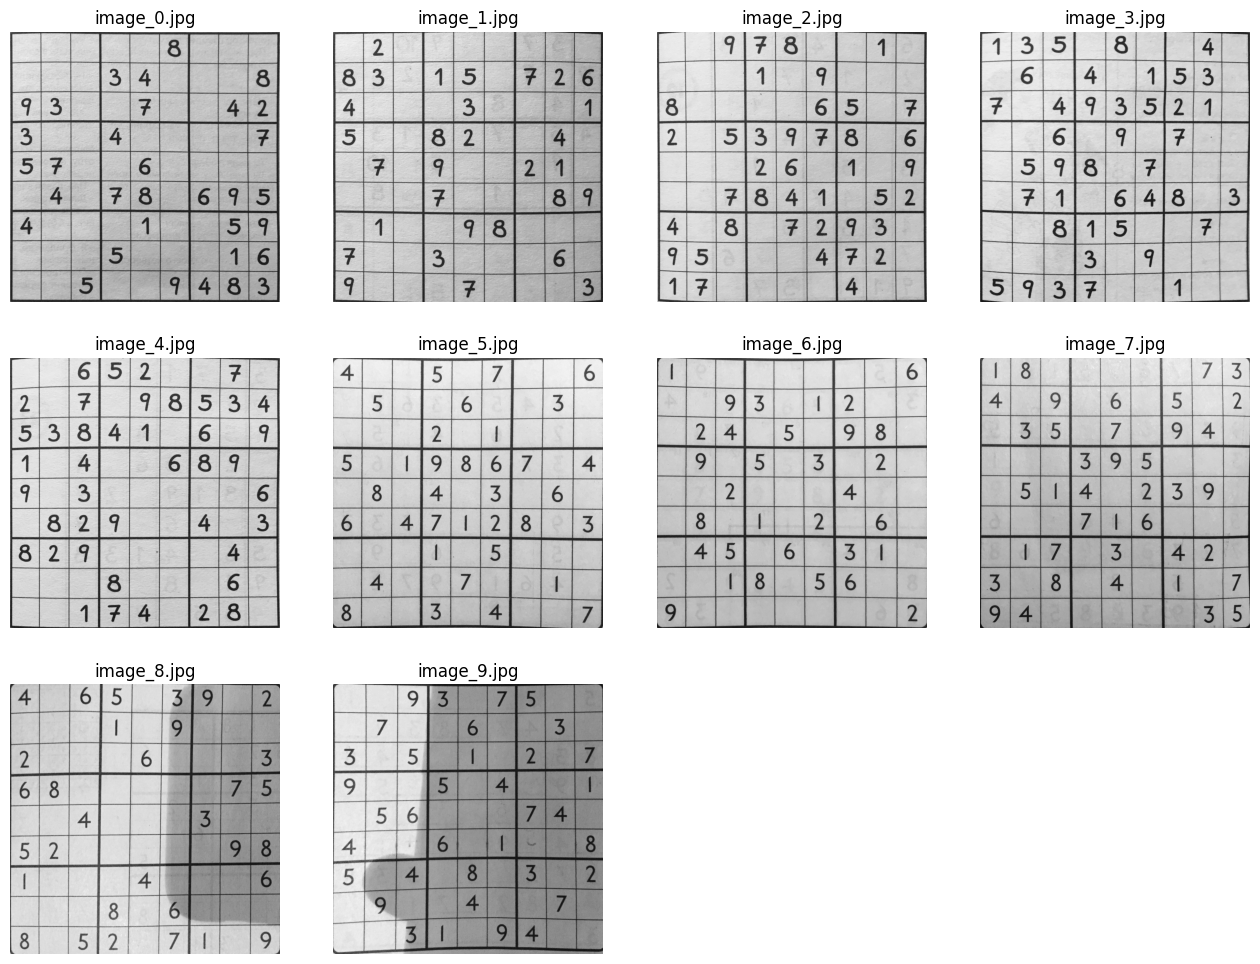

In [25]:
image_paths=[os.path.join(IMAGES_PATH, file_name) for file_name in sorted(os.listdir(IMAGES_PATH))
             if 'jpg' in os.path.splitext(file_name)[1]]

show_frontalized_images(image_paths=image_paths, pipeline=pipeline, figsize=(16, 12))

## Fix Frontalization Pipeline

Here you can fix your frontalization pipeline to focus on the _Digit Recognition_.\
Create a test frontalization pipeline in the function _get_test_pipeline_ in the `pipeline.py` file.

**!Attention!** The function _get_test_pipeline_ will be used in the `test.py` file.

In [26]:
import os

from utils import read_image, show_image
from pipeline import get_test_pipeline
from frontalization import frontalize_image

IMAGES_PATH = os.path.join(".", "sudoku_puzzles", "train")

In [27]:
pipeline = get_test_pipeline()

In [28]:
image_path = os.path.join(IMAGES_PATH, "image_9.jpg")
sudoku_image = read_image(image_path=image_path)
frontalized_image = frontalize_image(sudoku_image, pipeline=pipeline)

## 2. Digit Recognition

We will use frontalized cross-correlation score for digit recognition.\
As a result, we will get a $2\text{D}$ array (Sudoku matrix) of recognized digits and empty cells in the Sudoku grid.

To achieve this we should

1. manually create templates of all possible digits;
2. recognize digits based on frontalized cross-correlation scores between cells and templates.

You need to implement the functions inside the `recognition.py` file.

### 2.1 Create Templates

To create templates of digits printed in different styles we need to

1. go through different Sudoku images,
2. cut them into $9\times 9 = 81$ cells and
3. save binarized images of cells with different digits.

#### 2.1.1 Resize

To deal with images of different sizes we need to standardize the size of a single cell and consequently the size of the Sudoku grid (frontalized image).\
Let's use $64\times 64$ as the cell size and, accordingly, $576\times 576$ as the frontalized image size.

In [29]:
from recognition import SUDOKU_SIZE
from recognition import resize_image

In [30]:
resized_image = resize_image(frontalized_image, size=SUDOKU_SIZE)
print(f"Size is equal to {resized_image.shape}")

Size is equal to (576, 576)


#### 2.1.2 Get Sudoku Cells

Two questions are important here:

1. All cells in a Sudoku grid have borders. Do we need to preserve them in our templates?
2. Different images have different backgrounds and digits intensities. Should we preserve these intensities as they are in our templates?

In [31]:
from recognition import get_sudoku_cells
from utils import show_sudoku_cells

In [32]:
sudoku_cells = get_sudoku_cells(resized_image)

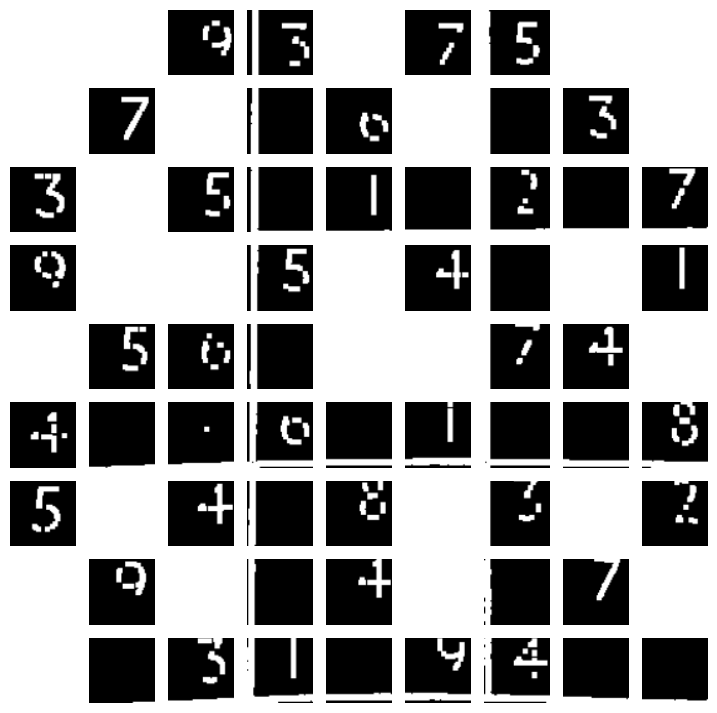

In [33]:
show_sudoku_cells(sudoku_cells)

### Create Templates

Now you can implement all the necessary stuff in the `create_template.py` file and then run it to create digit templates\
with the following command

```bash
python create_templates.py
```

**!Attention!** The function _get_test_pipeline_ from the `pipeline.py` file will be used in the `create_template.py` file.\
**!Attention!** You are allowed to create **no more than 2** templates for each digit.

In [34]:
!rm -rv ./templates/

removed './templates/8/image_0_8.jpg'
removed directory './templates/8'
removed './templates/3/image_0_3.jpg'
removed './templates/3/image_9_3.jpg'
removed directory './templates/3'
removed './templates/4/image_0_4.jpg'
removed './templates/4/image_9_4.jpg'
removed directory './templates/4'
removed './templates/9/image_0_9.jpg'
removed directory './templates/9'
removed './templates/7/image_0_7.jpg'
removed './templates/7/image_9_7.jpg'
removed directory './templates/7'
removed './templates/2/image_0_2.jpg'
removed './templates/2/image_9_2.jpg'
removed directory './templates/2'
removed './templates/5/image_0_5.jpg'
removed './templates/5/image_9_5.jpg'
removed directory './templates/5'
removed './templates/6/image_0_6.jpg'
removed directory './templates/6'
removed './templates/1/image_0_1.jpg'
removed './templates/1/image_9_1.jpg'
removed directory './templates/1'
removed directory './templates/'


In [35]:
!python create_templates.py

image_0.jpg: 100% 9/9 [00:00<00:00, 66.78it/s]
image_9.jpg: 100% 6/6 [00:00<00:00, 157.50it/s]


### 2.2 Recognize Digits

We will use a [_normalized cross-correlation score_](https://scikit-image.org/docs/stable/api/skimage.feature.html#skimage.feature.match_template) to compare the Sudoku cell image to the created digit templates.\
The main question is how we can use the information from all the different templates that are related to the same digit.

#### 2.2.1 Correlation

In [36]:
from recognition import load_templates, get_digit_correlations, show_correlations

In [37]:
templates_dict = load_templates()

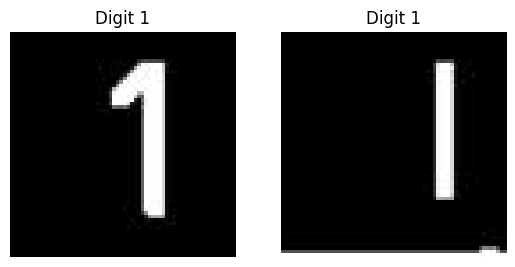

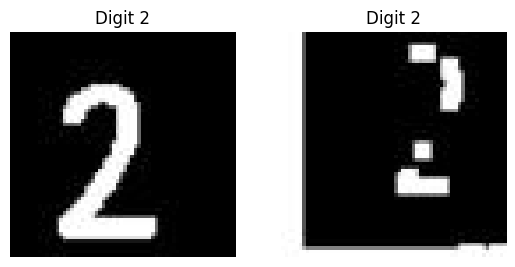

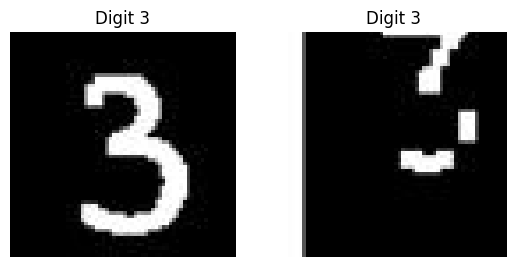

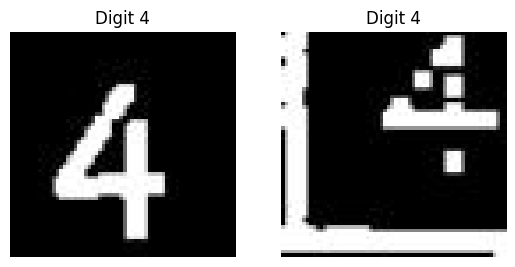

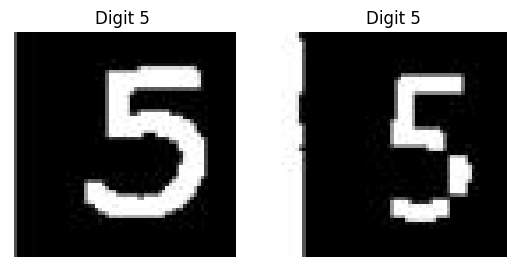

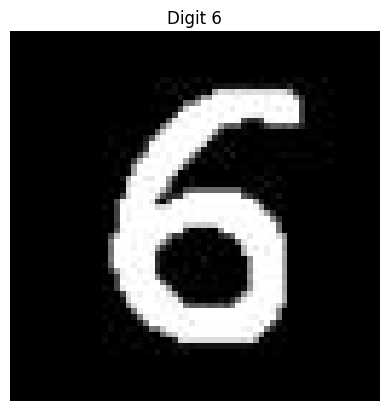

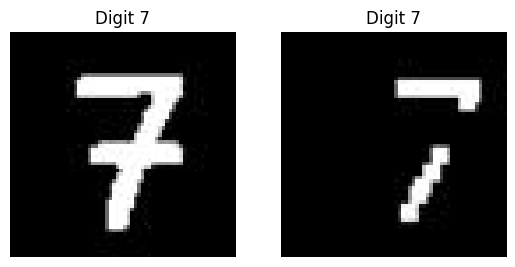

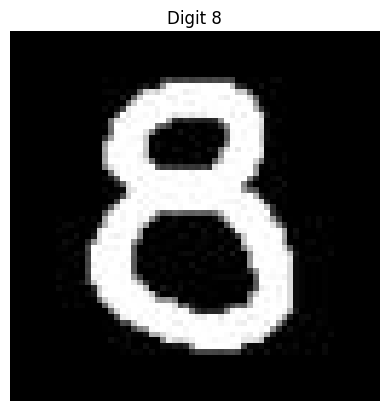

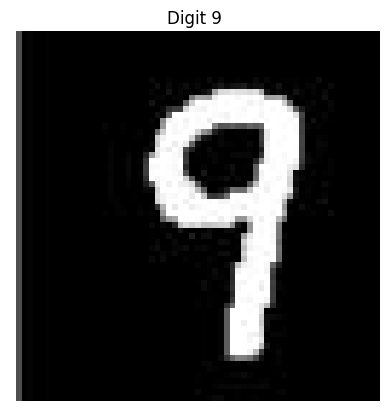

In [38]:
# Visualize templates for each digit
import matplotlib.pyplot as plt

for digit, templates in templates_dict.items():
    for idx, template in enumerate(templates):
        plt.subplot(1, len(templates), idx+1)
        plt.imshow(template, cmap='gray')
        plt.title(f"Digit {digit}")
        plt.axis('off')
    plt.show()

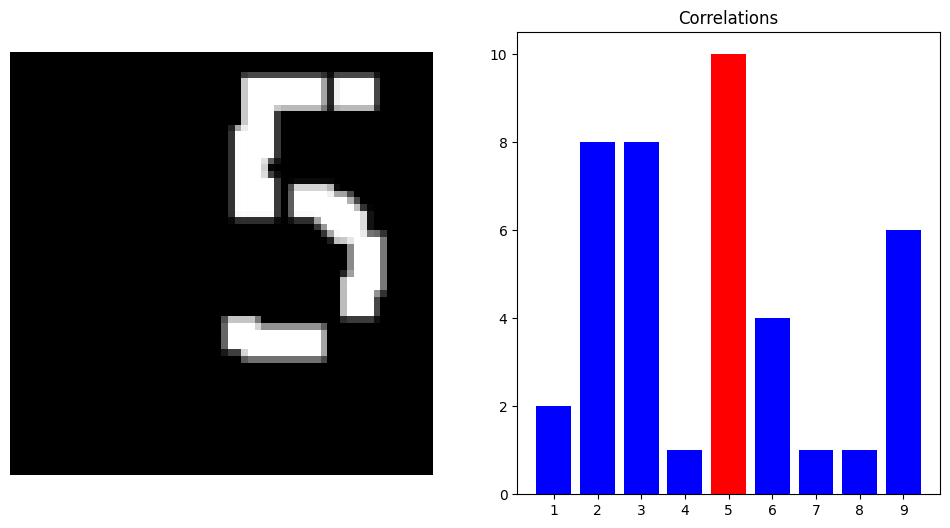

In [39]:
sudoku_cell = sudoku_cells[4, 1]

correlations = get_digit_correlations(sudoku_cell, templates_dict)
show_correlations(sudoku_cell, correlations)

#### 2.2.2 Sudoku Matrix

Now we need to create a Sudoku matrix with $0$s in empty cells to run the Sudoku solving algorithm.\
How can we determine that a Sudoku cell is empty?

In [40]:
from recognition import recognize_digits, show_recognized_digits

In [41]:
sudoku_matrix = recognize_digits(sudoku_cells, templates_dict)

In [42]:
sudoku_matrix

array([[0, 0, 3, 6, 0, 0, 5, 0, 0],
       [0, 7, 0, 1, 0, 0, 0, 2, 0],
       [7, 0, 5, 1, 6, 0, 2, 0, 1],
       [3, 0, 0, 5, 0, 1, 0, 0, 0],
       [0, 5, 0, 4, 0, 0, 1, 1, 0],
       [2, 0, 0, 5, 0, 5, 4, 2, 6],
       [5, 0, 3, 0, 3, 0, 3, 0, 0],
       [0, 5, 0, 2, 3, 0, 2, 0, 0],
       [0, 0, 6, 2, 1, 1, 4, 2, 0]], dtype=uint8)

  0%|          | 0/10 [00:00<?, ?it/s]

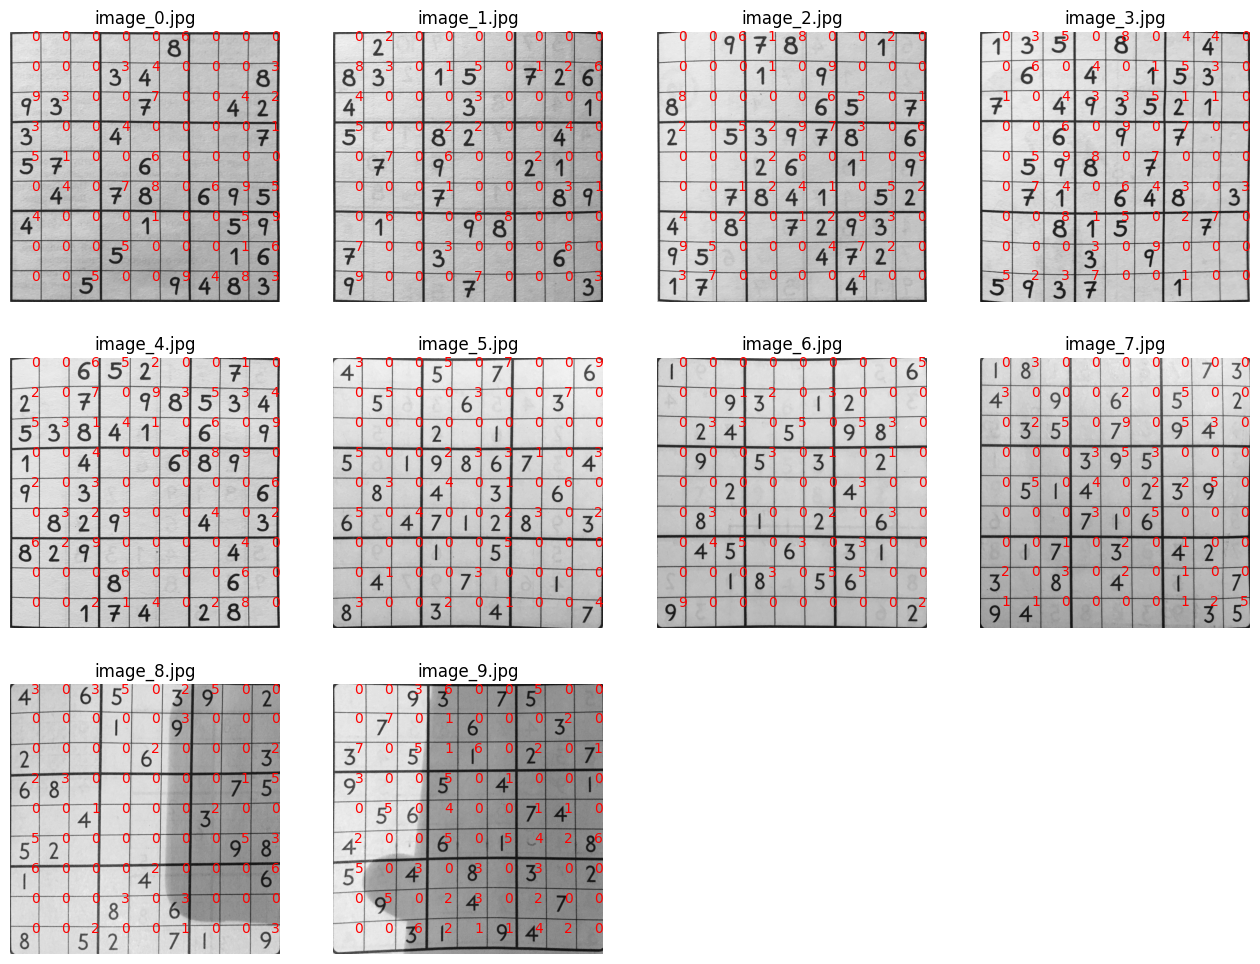

In [43]:
image_paths=[os.path.join(IMAGES_PATH, file_name) for file_name in sorted(os.listdir(IMAGES_PATH))
             if 'jpg' in os.path.splitext(file_name)[1]]

show_recognized_digits(image_paths=image_paths, pipeline=pipeline,
                       crop_factor=0.8,
                       binarization_kwargs={'blockSize': 11, 'C': 2},
                       figsize=(16, 12), digit_fontsize=10)

## 3. Solve Sudoku

Now we will use the _solve_sudoku_ function from the `sudoku_solver.py` file to solve the Sudoku puzzle.

In [44]:
from sudoku_solver import matrix_to_puzzle, solve_sudoku
from recognition import show_solved_sudoku

In [45]:
print(matrix_to_puzzle(sudoku_matrix))

 .  .  3 | 6  .  . | 5  .  .
 .  7  . | 1  .  . | .  2  .
 7  .  5 | 1  6  . | 2  .  1
---------+---------+---------
 3  .  . | 5  .  1 | .  .  .
 .  5  . | 4  .  . | 1  1  .
 2  .  . | 5  .  5 | 4  2  6
---------+---------+---------
 5  .  3 | .  3  . | 3  .  .
 .  5  . | 2  3  . | 2  .  .
 .  .  6 | 2  1  1 | 4  2  .


In [46]:
sudoku_matrix_solved = solve_sudoku(sudoku_matrix)

ValueError: ignored

In [ ]:
print(matrix_to_puzzle(sudoku_matrix_solved))

In [ ]:
show_solved_sudoku(frontalized_image, sudoku_matrix, sudoku_matrix_solved)